In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('speed_dating_data.csv')

In [3]:
#check for duplicates
df.duplicated().sum()

0

### Success rates by race and gender 

In [5]:
#use groupby to find the count of match in each race group 

#find the total number of matches each race got by calculating the sum of matches in the 'match' column
by_race = df.groupby('race').agg({'match': 'sum'})

#find the total number of people in each race group by calculating the count of the 'race' column 
by_race['total'] = df.groupby('race').agg({'race': 'count'})

#find the percentage of success rates by dividing 
by_race['success rate'] = round(by_race['match']/by_race['total'],2)*100

#create new race column that we can alter later on
by_race['race_names'] = by_race.index

#rename the values in the race column to make it more readable
by_race['race_names'] = by_race['race_names'].replace({ 
    1: 'Black/African American',
    2: 'European/Caucasian-American',
    3: 'Latino/Hispanic American',
    4: 'Asian',
    5: 'Native American',
    6: 'Other'
})

by_race 

,match,total,success rate,race_names
race,,,,
1.0,85,420,20.0,Black/African American
2.0,788,4727,17.0,European/Caucasian-American
3.0,123,664,19.0,Latino/Hispanic American
4.0,267,1982,13.0,Asian
6.0,103,522,20.0,Other


<Figure size 1000x600 with 0 Axes>

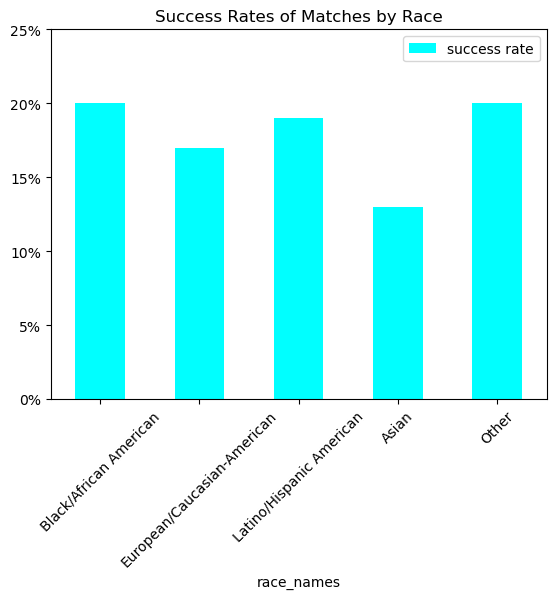

In [6]:
#plot the success rates  
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plot
plt.figure(figsize=(10,6))

# Se
by_race.plot( 'race_names', 'success rate', kind='bar', color='cyan')

#rotate the x labels to make them more readable
plt.xticks(rotation=45)
#set the title
plt.title('Success Rates of Matches by Race')
#set y limit to 1 to make the graph more readable
plt.ylim(0,25)

#add % to the y axis 
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}%".format(int(x))))


plt.show()


### Success rates by race and gender

In [69]:
race_gender = df.groupby(['race', 'gender']).agg({'match': 'sum'})

race_gender['total'] = df.groupby(['race', 'gender']).agg({'match': 'count'})

race_gender['success_rate'] = round(race_gender['match']/race_gender['total'],2)*100
#name every race 

race_gender

match  total  success_rate
race gender                            
1.0  0          52    241          22.0
     1          33    179          18.0
2.0  0         339   2207          15.0
     1         449   2520          18.0
3.0  0          78    403          19.0
     1          45    261          17.0
4.0  0         160   1045          15.0
     1         107    937          11.0
6.0  0          52    245          21.0
     1          51    277          18.0

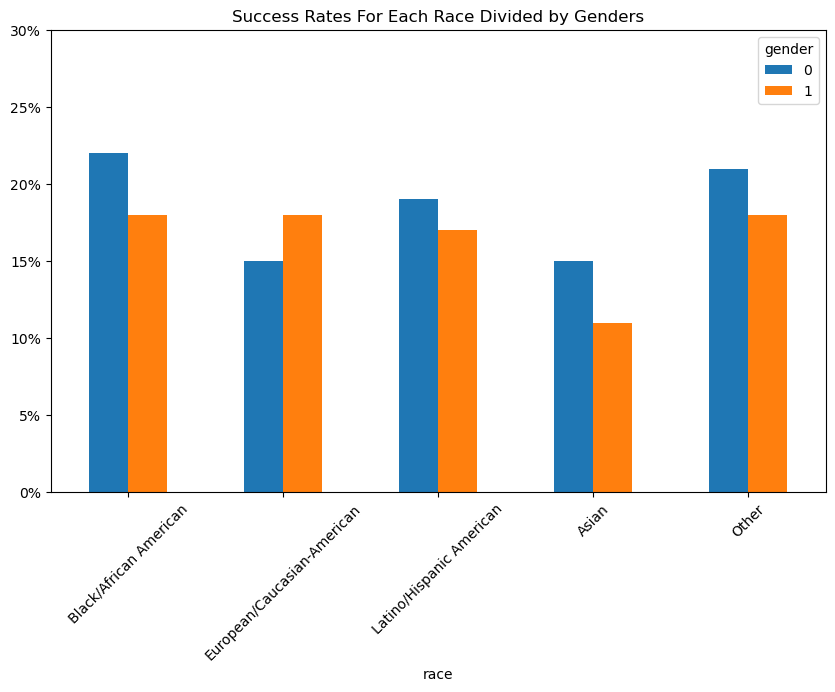

In [68]:
#create a pivot table with the index as columns and the columns as the index
#and values for each as the success rate so that i can plot grouped data
pivot_table = race_gender.pivot_table(index='race', columns='gender', values='success_rate')

#create pivot table
pivot_table.plot(kind='bar', figsize=(10,6))

#rotate the x labels to make them more readable
plt.xticks(rotation=45)
#set the ylimit to 30 
plt.ylim(0,30)
#create percentage labels
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}%".format(int(x))))
#change xlabels to their respective races 
plt.xticks([0,1,2,3,4], ['Black/African American', 'European/Caucasian-American', 'Latino/Hispanic American', 'Asian', 'Other'])
#set the title as Success rates divided through race
plt.title('Success Rates For Each Race Divided by Genders')

plt.show()

In [71]:
display(pivot_table)

display(pivot_table.mean())

gender,0,1
race,,
1.0,22.0,18.0
2.0,15.0,18.0
3.0,19.0,17.0
4.0,15.0,11.0
6.0,21.0,18.0


gender
0    18.4
1    16.4
dtype: float64

### INTER-RACIAL AND INTRA-RACIAL SUCCESS RATES

In [115]:
#groupby samerace, we find that we get more matches for inter racial speed dates 
matched_same_race = df.groupby('samerace').agg({'match': ['sum', 'count']})

matched_same_race['match', 'success_rate'] = 
matched_same_race


match      
           sum count
samerace            
0          814  5062
1          566  3316

In [116]:

'''
# same race matches for both male and female
same_race = df[(df['samerace'] == 1)][['gender', 'race', 'race_o', 'match']]

#highest 
same_race_grouped = same_race.groupby(['race', 'gender']).agg({'match': ['sum', 'count']})

same_race_grouped['match', 'success_rate'] = same_race_grouped['match', 'sum']/same_race_grouped['match', 'count']
df[(df['samerace'] == 0) & (df['match'] == 1) & (df['dec_o'] == 1)][['gender', 'race', 'race_o']]
same_race_grouped
'''

"\n# same race matches for both male and female\nsame_race = df[(df['samerace'] == 1)][['gender', 'race', 'race_o', 'match']]\n\n#highest \nsame_race_grouped = same_race.groupby(['race', 'gender']).agg({'match': ['sum', 'count']})\n\nsame_race_grouped['match', 'success_rate'] = same_race_grouped['match', 'sum']/same_race_grouped['match', 'count']\ndf[(df['samerace'] == 0) & (df['match'] == 1) & (df['dec_o'] == 1)][['gender', 'race', 'race_o']]\nsame_race_grouped\n"

,gender,race,race_o
3,0,4.0,2.0
4,0,4.0,3.0
8,0,4.0,2.0
53,0,4.0,2.0
58,0,4.0,2.0
...,...,...,...
8346,1,1.0,2.0
8356,1,2.0,4.0
8357,1,2.0,3.0
8363,1,2.0,4.0


### MISC STUDIES

In [35]:
#count the number of participants by seeing iid unique 

df['iid'].nunique()

551

In [48]:
df[df['condtn'] == 1]['condtn'].count()

1434

In [49]:
df[(df['condtn'] == 1) & (df['match']==1)]['match'].count()/df[df['condtn'] == 1]['condtn'].count()

0.20223152022315202

In [50]:
df[(df['condtn'] == 2) & (df['match'] == 1)]['match'].sum()/df[df['condtn'] == 2]['condtn'].count()

0.15697004608294932